# The Reinforcement Learning Problem

Humans naturally **pursue feelings of happiness**. From picking out our meals to advancing our careers, every action we choose is derived from **our drive to experience rewarding moments in life**. Whether these moments are self-centered pleasures or the more generous of goals, whether they bring us immediate gratification or long-term success, they’re still **our perception of how important and valuable they are**. Our ability to achieve these precious moments seems to be correlated with **intelligence**, defined as the ability to acquire and apply knowledge and skills.

Reinforcement learning (RL) is the task of **learning through trial and error**. In this type of task, no human labels data, and no human collects or explicitly designs the collection of data. The goal in RL is **to act**.

## Reinforcement Learning Cycle

Reinforcement Learning is **a computational approach to learning from interaction**. In particular, it is learning what to do (how to map situations to actions) in order to maximize a numerical reward signal. The **agent** is not told which actions to take, but instead must discover which actions yield the most reward by trying them on its **environment** (everything outside the agent, everything the agent has no total control over). In the most interesting and challenging cases, actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards. These two characteristics (**trial-and-error search** and **delayed reward**) are the two most important distinguishing features of reinforcement learning. 

Imagine you’re training a robot to pick up objects. The objects to be picked up, the tray where the objects lay, the wind, and everything outside the decision maker are part of the environment. That means the robot arm is also part of the environment, because it isn’t part of the agent. And even though the agent can decide to move the arm, the actual arm movement is noisy, and thus the arm is part of the environment. This strict **boundary between the agent and the environment** is counterintuitive at first, but the decision maker, the agent, can only have a single role: making decisions. Everything that comes after the decision gets bundled into the environment.

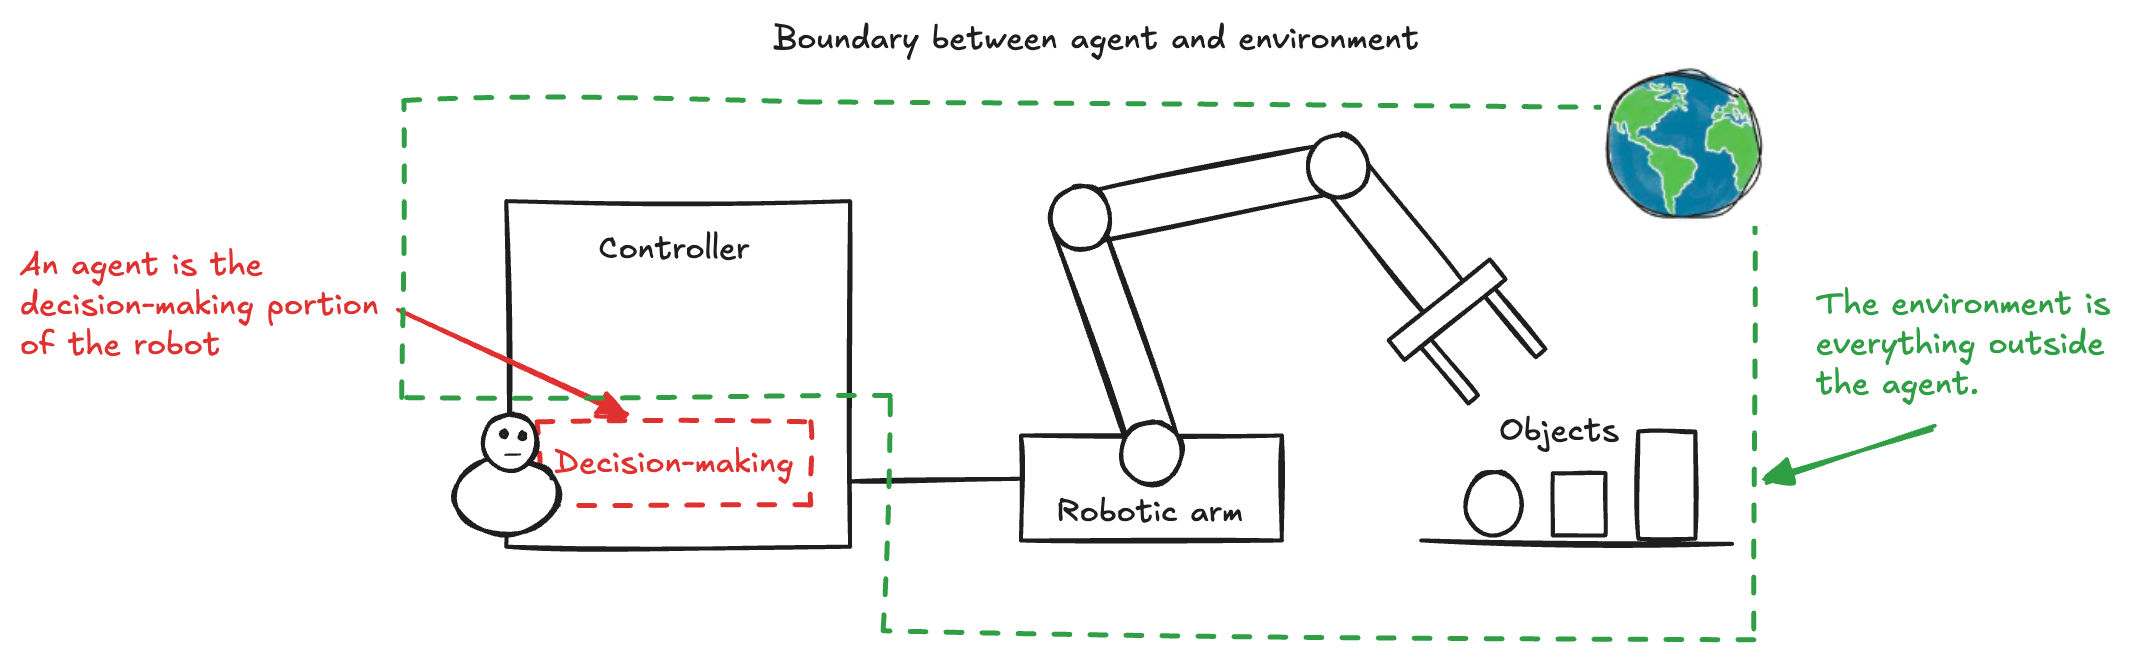

The environment is represented by **a set of variables related to the problem**. For instance, in the robotic arm example, the location and velocities of the arm would be part of the variables that make up the environment. This set of variables and all the possible values that they can take are referred to as the **state space**. A state is an instantiation of the state space, a set of values the variables take. Interestingly, often, agents don’t have access to the actual full state of the environment. The part of a state that the agent can observe is called an **observation**. Observations depend on states but are what the agent can see. For instance, in the robotic arm example, the agent may only have access to camera images. While an exact location of each object exists, the agent doesn’t have access to this specific state. Instead, the observations the agent perceives are derived from the states. You’ll often see in the literature observations and states being used interchangeably.

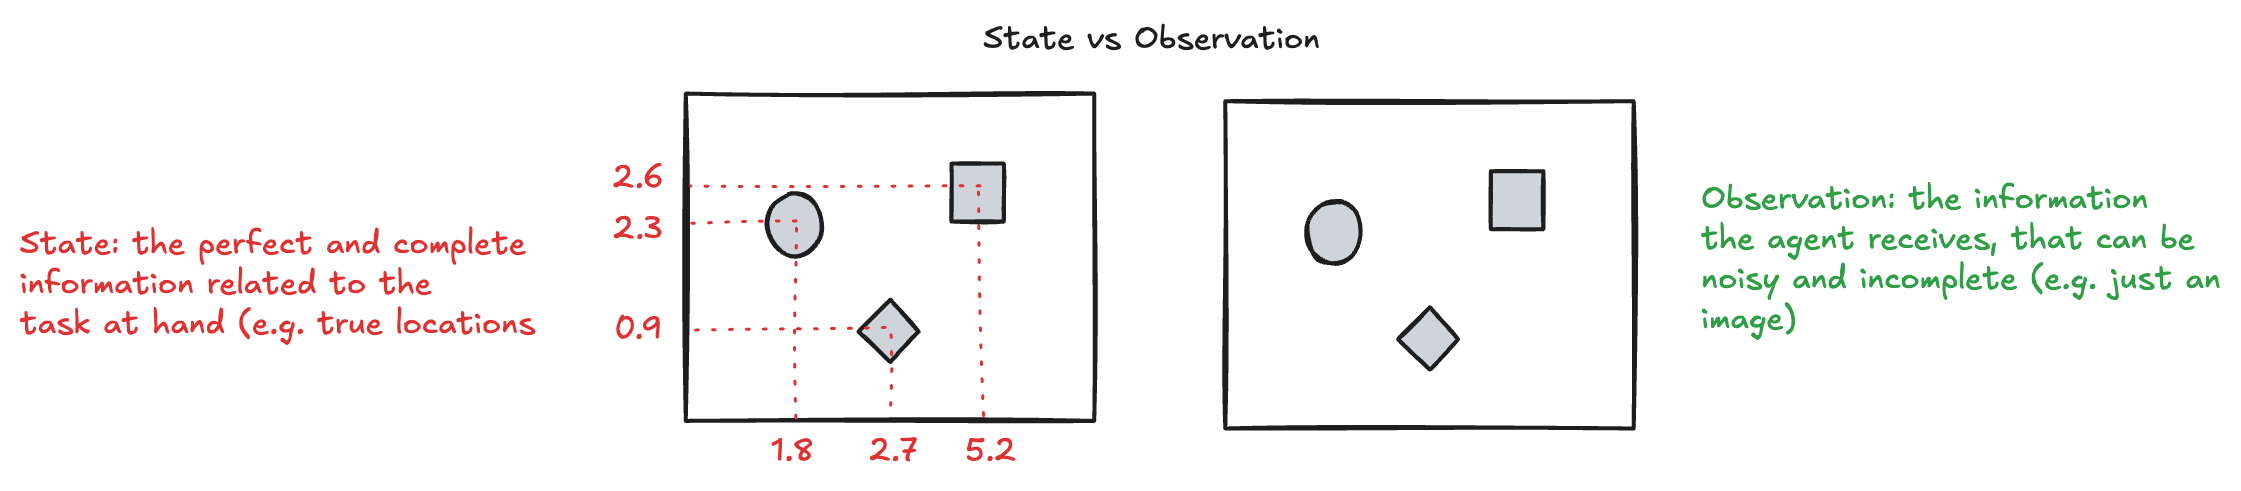

At each state, the environment makes available a **set of actions** the agent can choose from. The agent influences the environment through these actions. The environment may change states as a response to the agent action. The function responsible for this mapping is called the **transition function**. The environment also provides a **reward signal** as a response and the function responsible for this mapping is called the **reward function**. The set of transition and reward functions is referred to as the **model** of the environment.

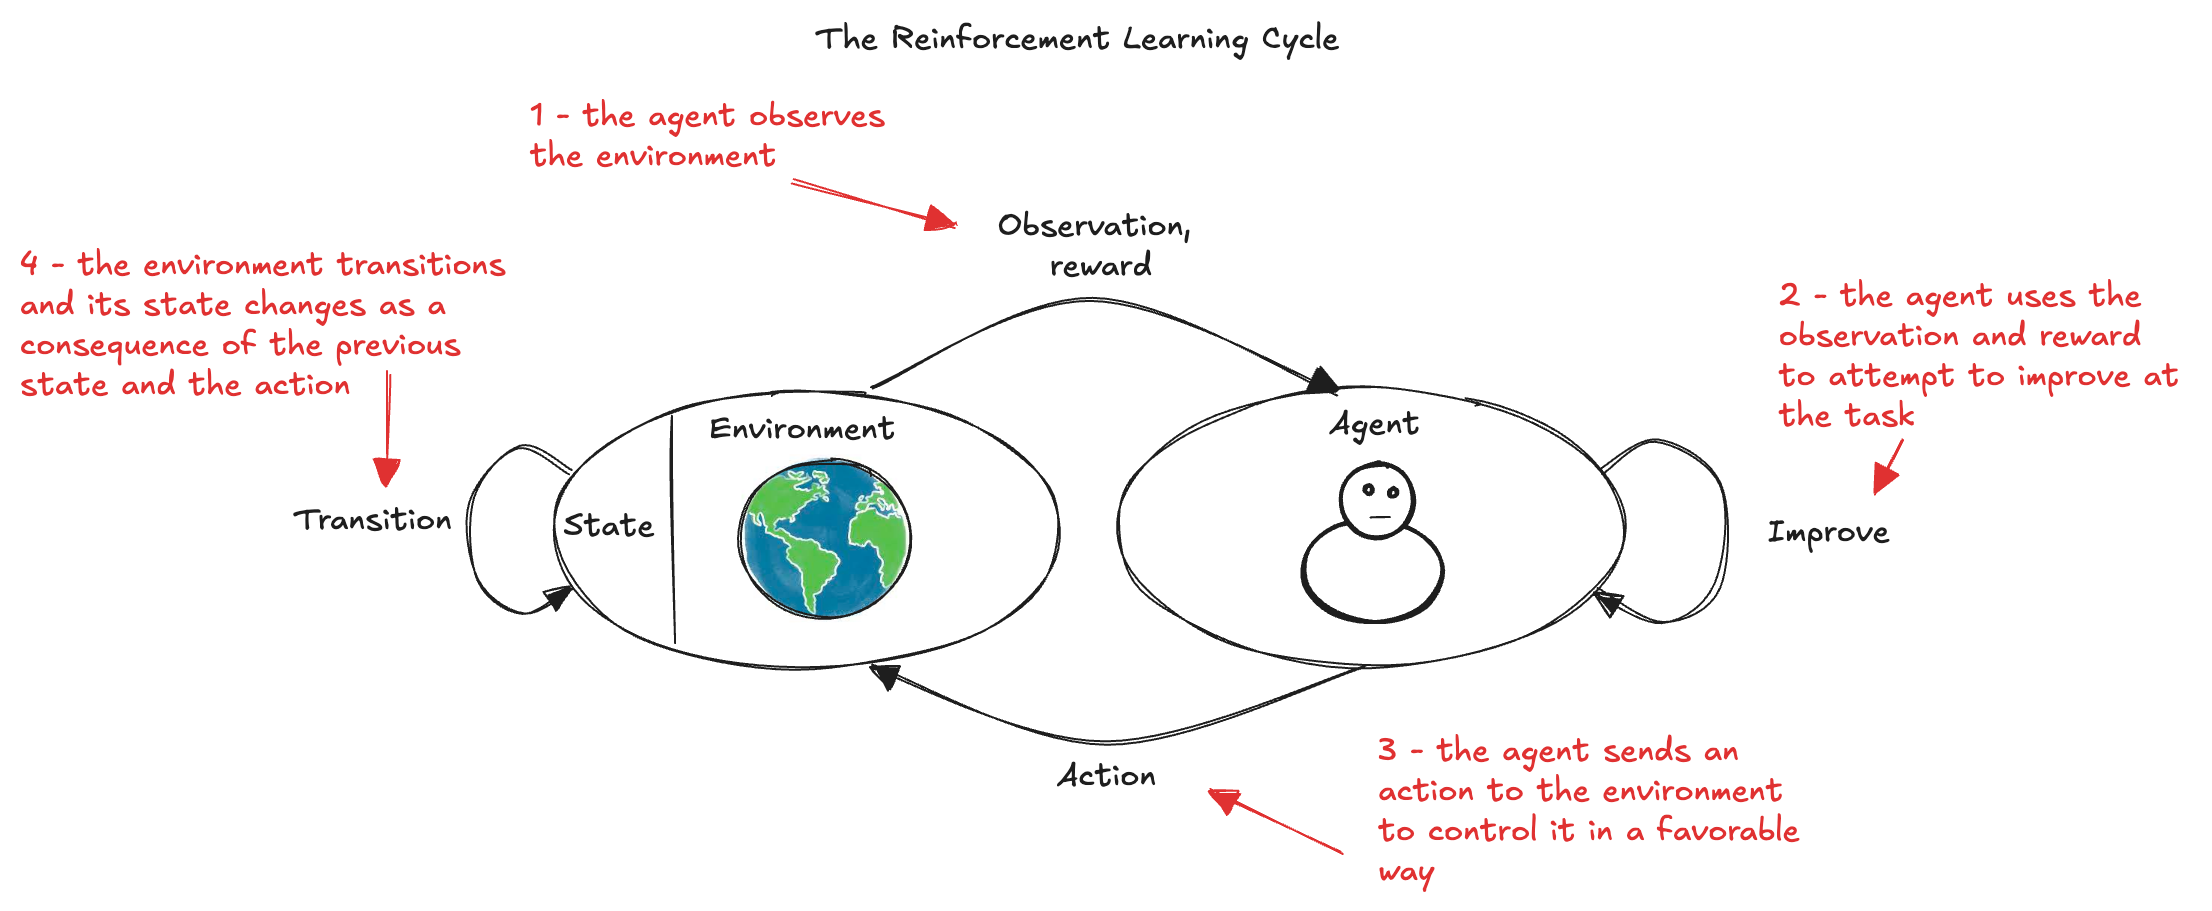

The agent has a three-step process: the agent interacts with the environment, evaluates its behavior using the reward signal obtained as a feedback from the environment, and finally it improves its responses. The interactions between the agent and the environment go on for several cycles. Each cycle is called a **time step**. At each time step, the agent observes the environment, takes action, and receives a new observation and reward. The set of the state, the action, the reward, and the new state is called an **experience**. The task may or may not have a natural ending. Tasks that have a natural ending, such as a game, are called **episodic tasks**. Conversely, tasks that don’t are called **continuing tasks**, such as learning forward motion. The sequence of time steps from the beginning to the end of an episodic task is called an **episode**. Agents may take several time steps and episodes to learn to solve a task.

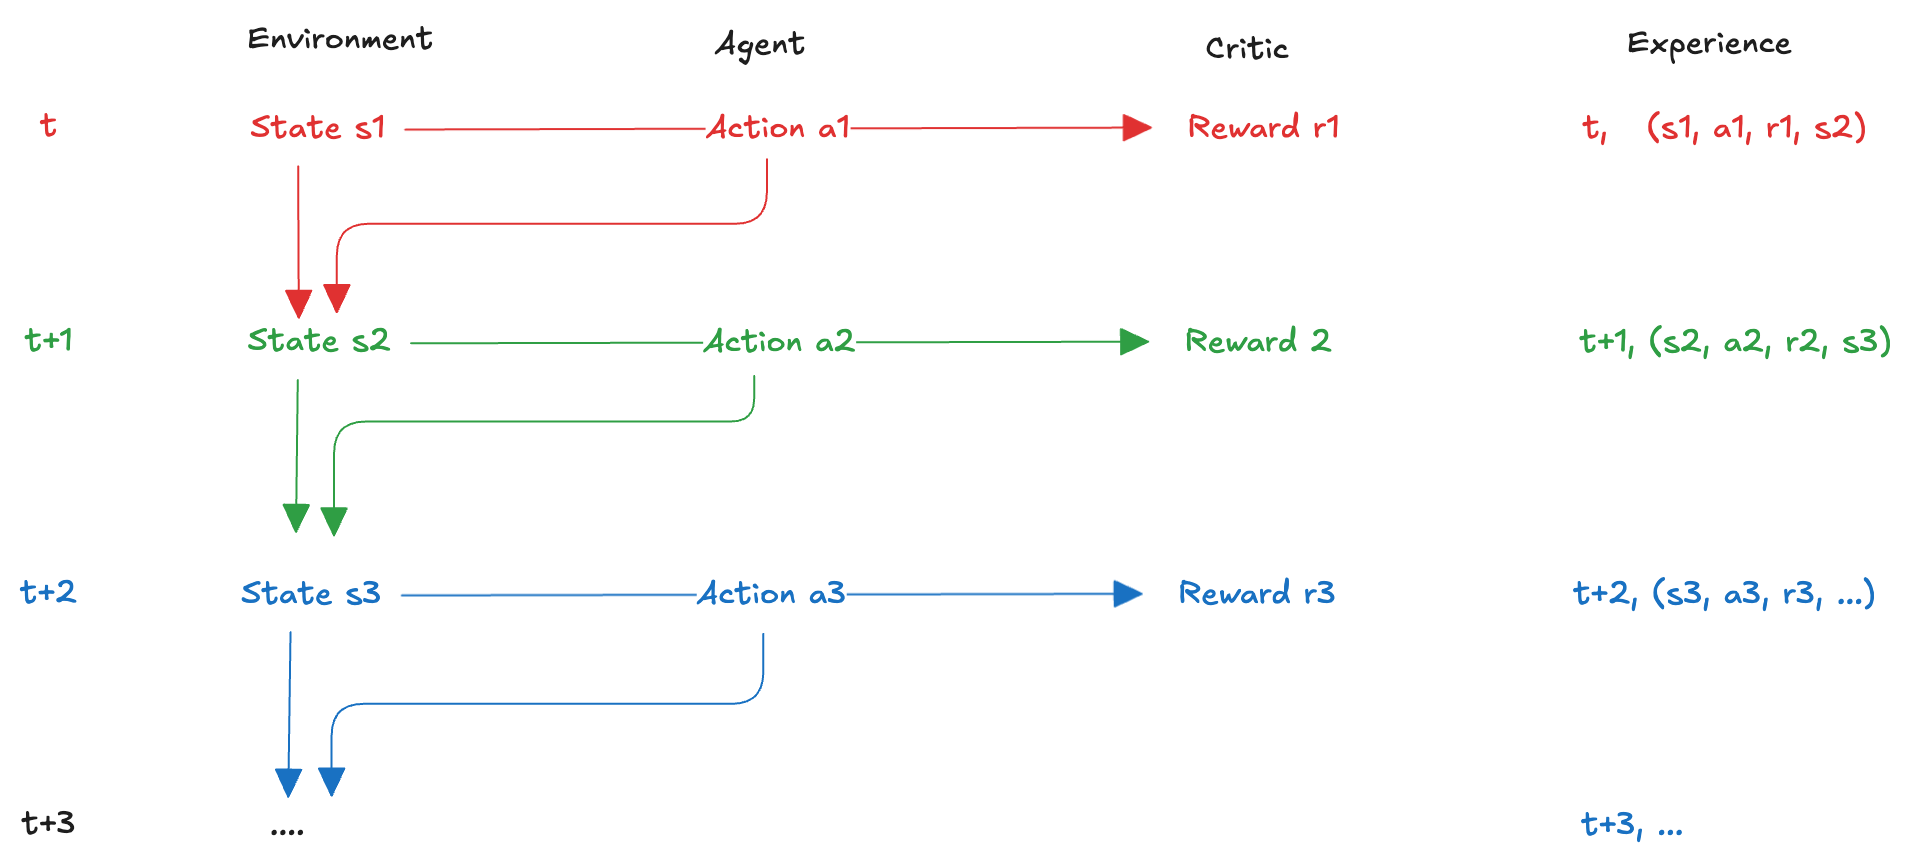

The action taken by the agent may have **delayed consequences**. The reward may be sparse and only manifest after several time steps. Thus the agent must be able to learn from sequential feedback, that rise to a problem referred to as the **temporal credit assignment problem**: how to determine which state/action is responsible for a reward?

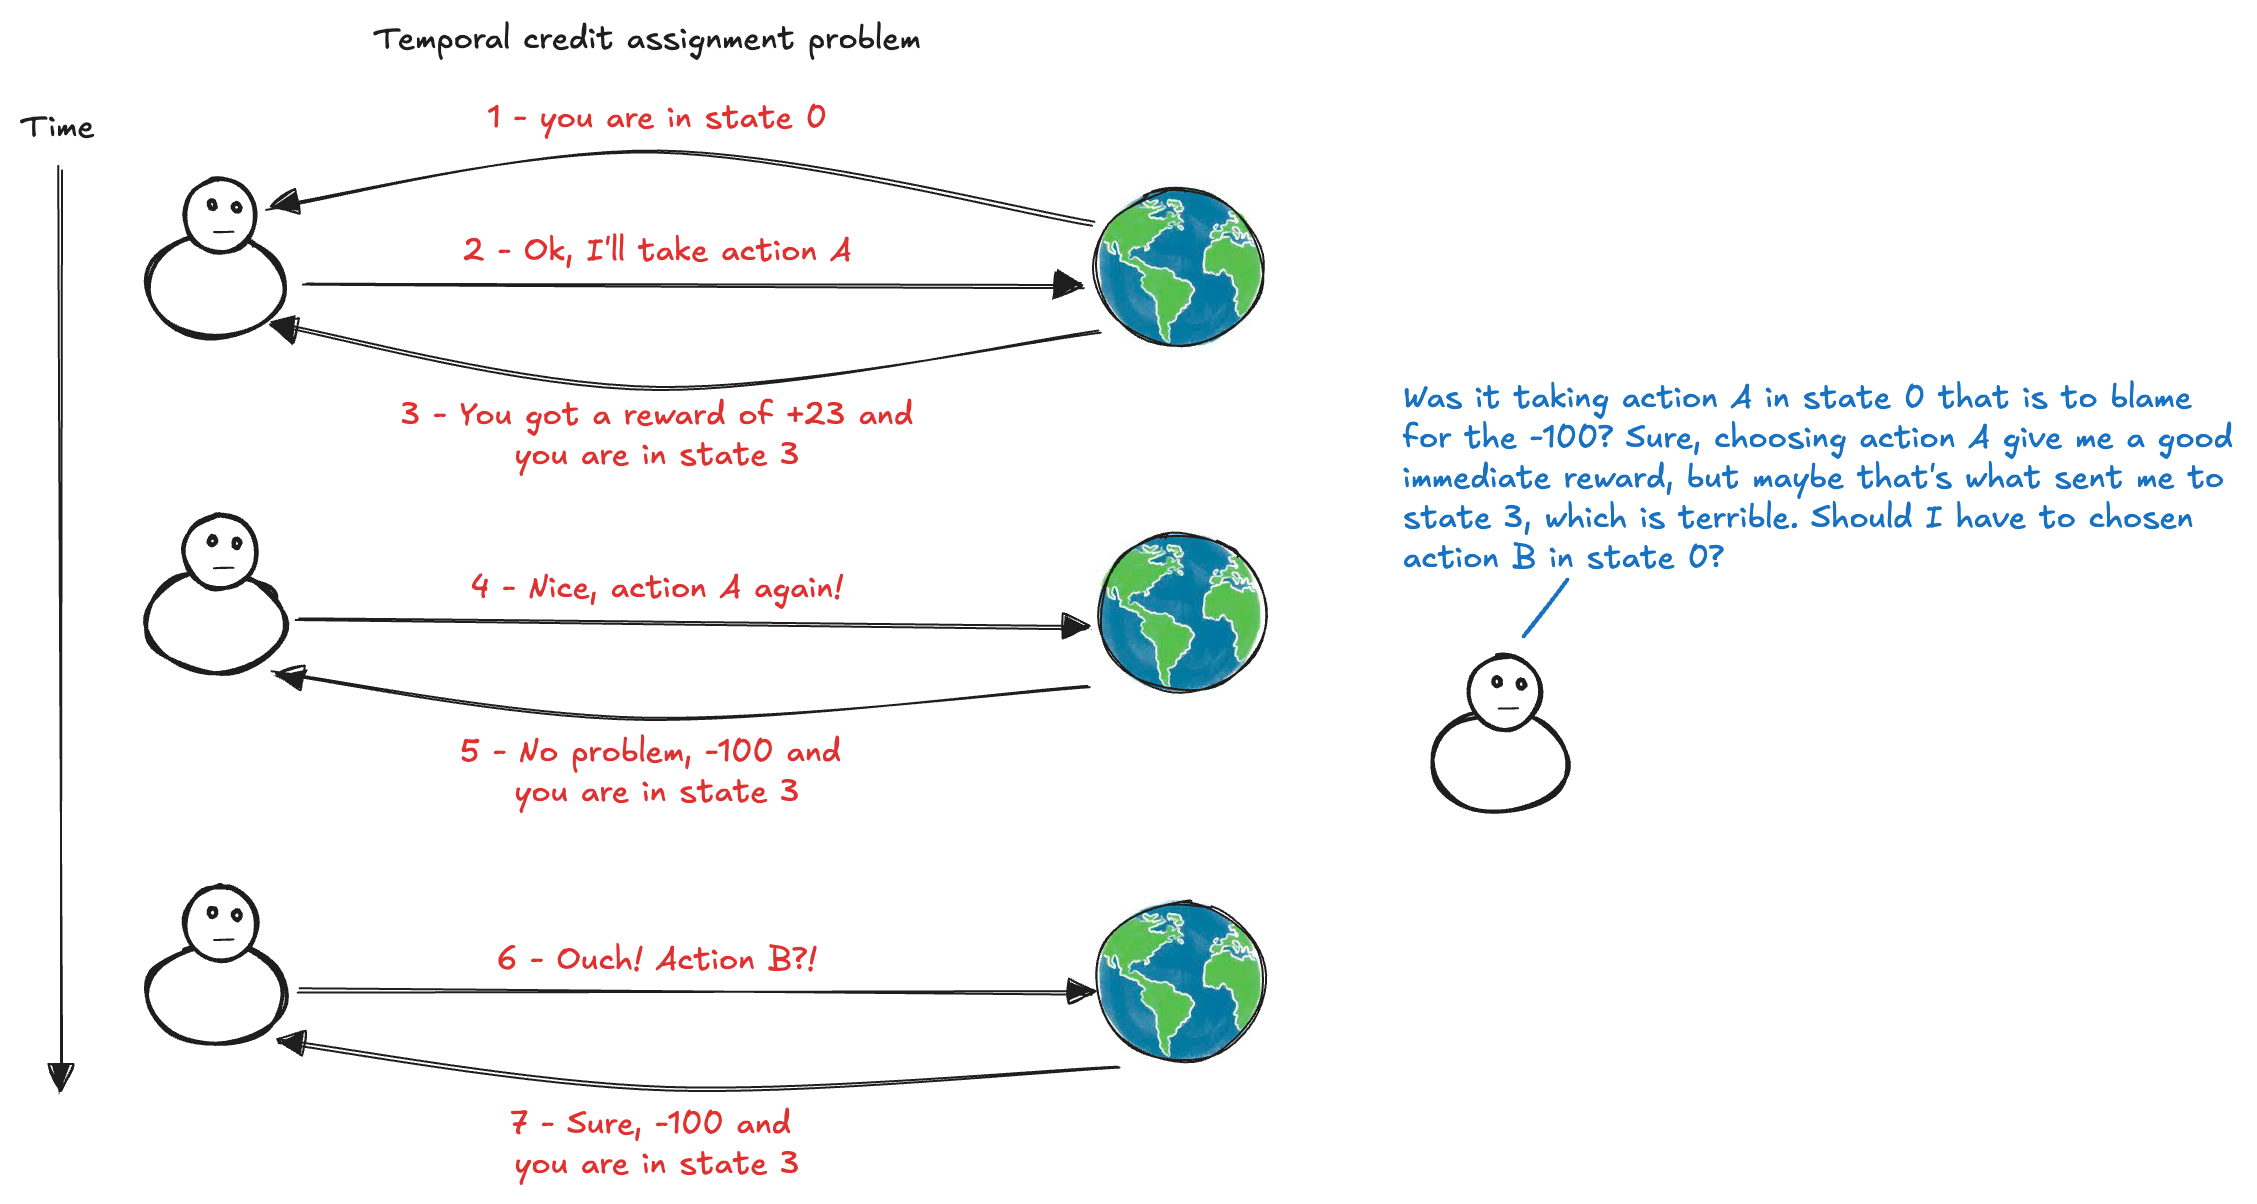

Moreover, the reward received by the agent is **weak**, in the sense that it don't provide supervision. The reward **indicate goodness but not correctness**, meaning it contains no information about other potential rewards. Thus the agent must be able to learn from **evaluative feedback**, that rise the need for **exploration**. The agent must be able to balance the gathering of information with the **exploitation** of current information, which is referred to as the **exploration versus exploitation trade-off**.

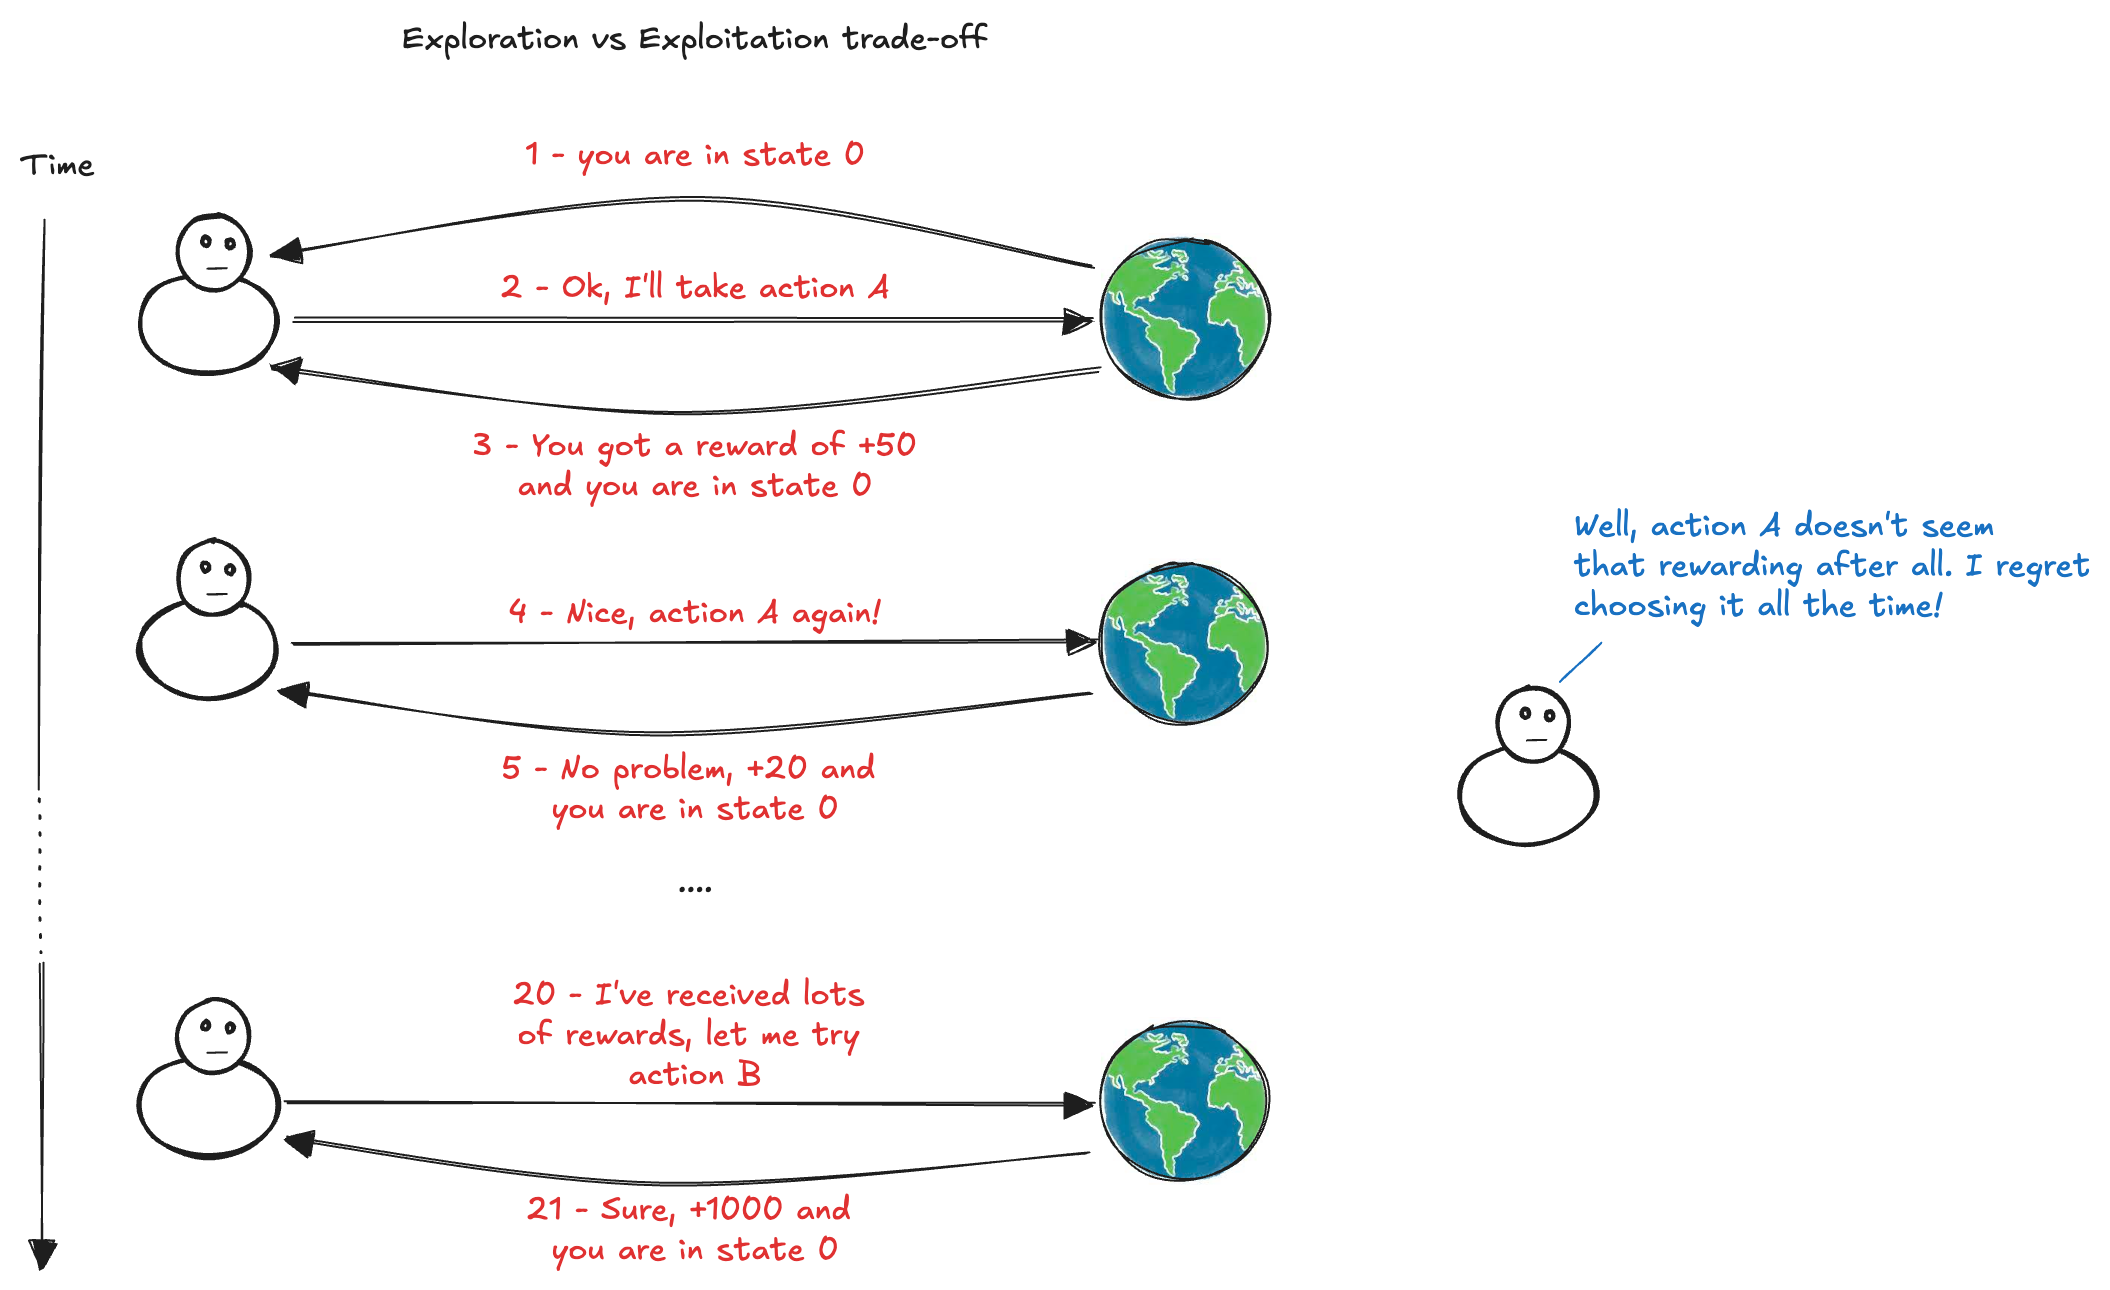

Finally, the reward received by the agent is just a **sample**, and the agent doesn’t have access to the reward function. Also, the state and action spaces are commonly large, even infinite, so trying to learn from **sparse and weak feedback** becomes a harder challenge with samples. Therefore, the agent must be able to learn from sampled feedback, and it must be able to generalize.

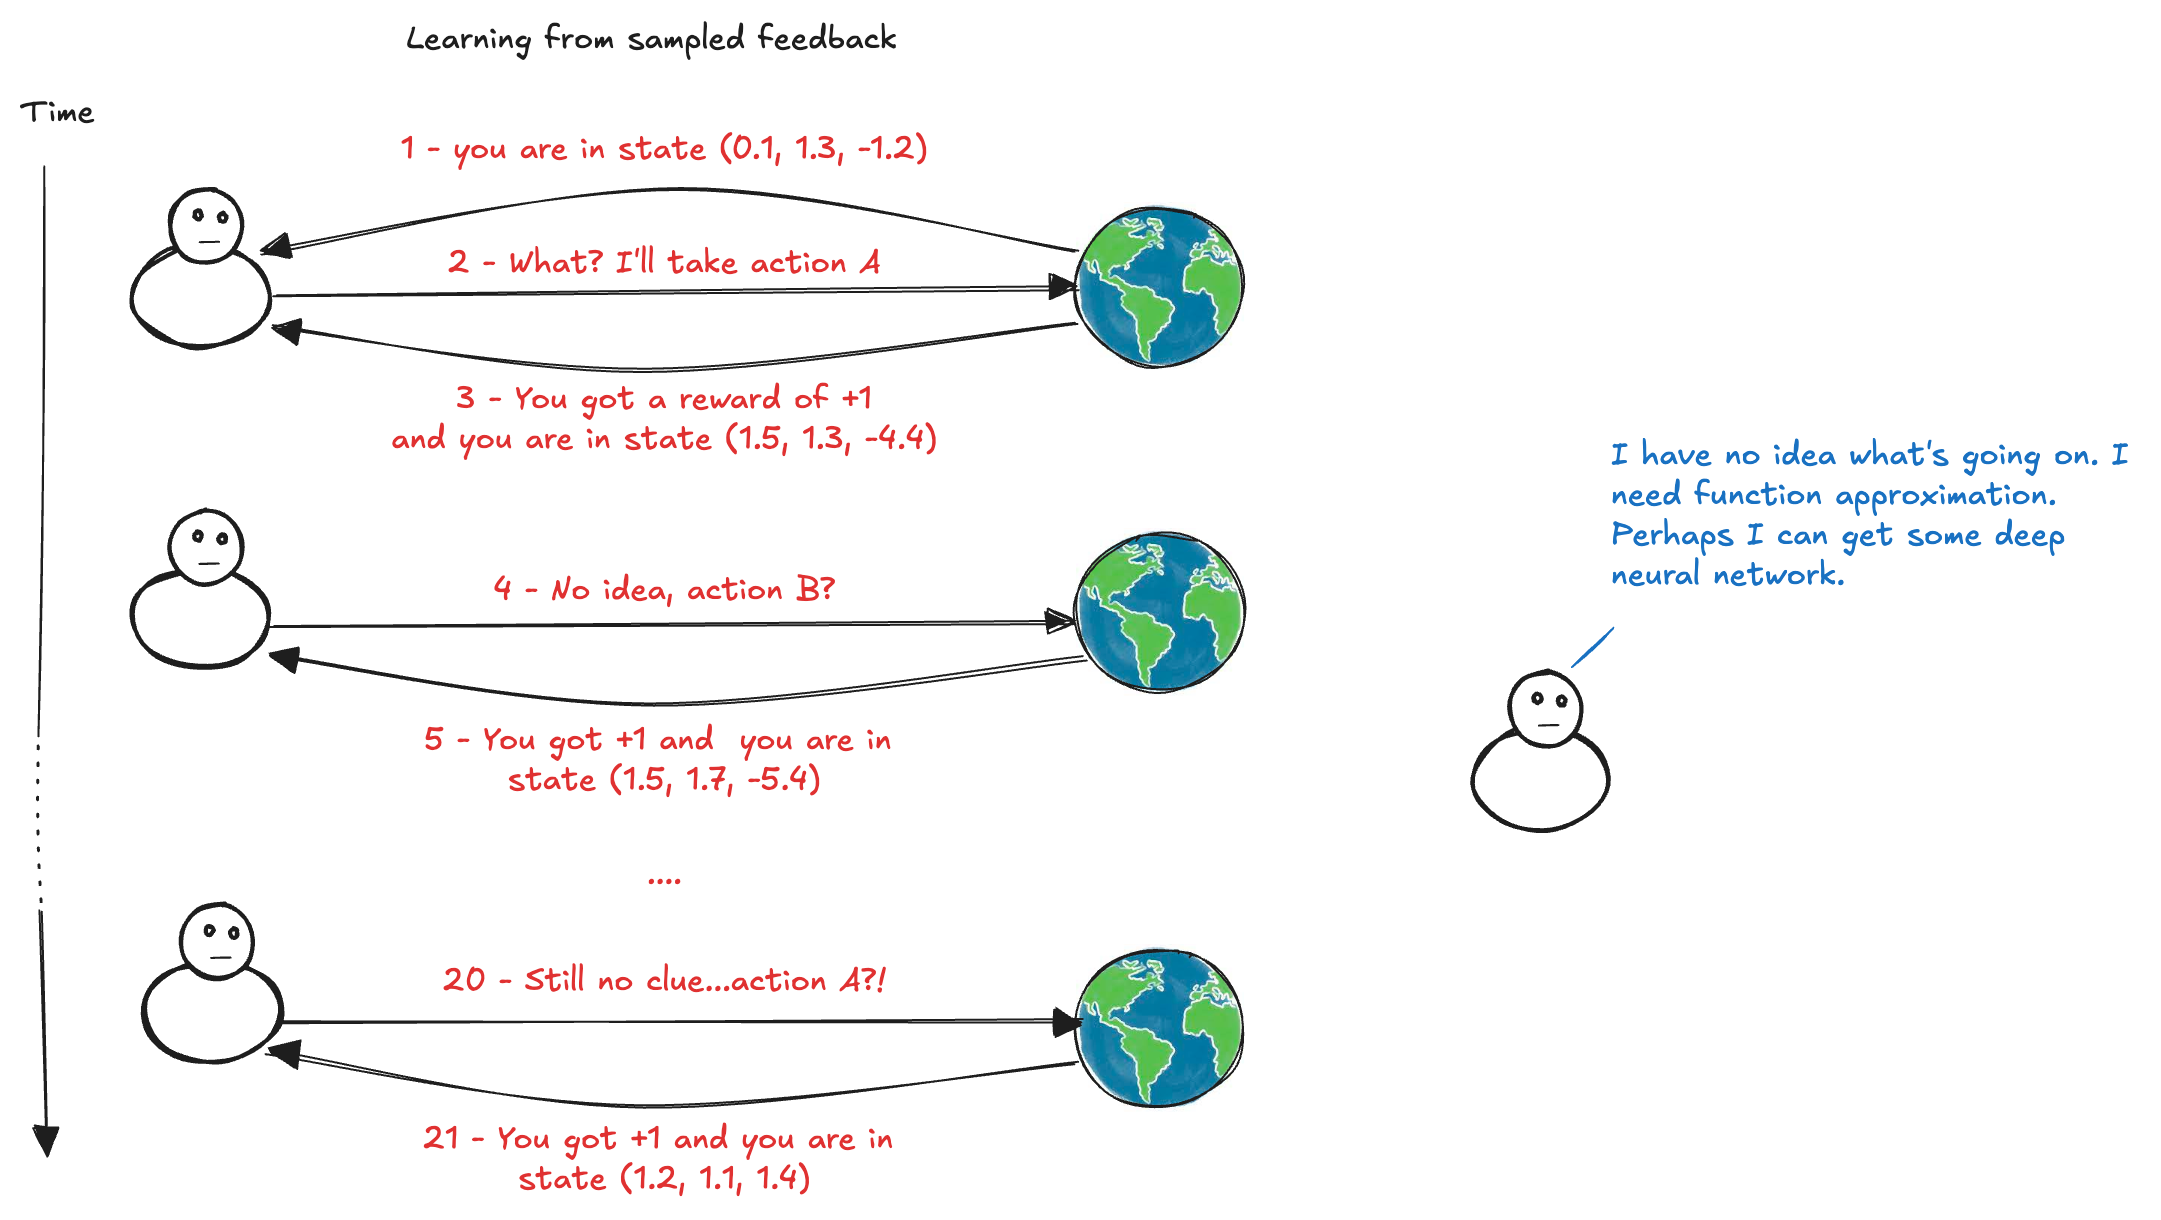

## Mathematical foundation

The **Markov Decision Process** (MDP) is a framing of the problem of learning from interaction to achieve a goal. The agent and environment interact at each discrete time step of a sequence 

$\displaystyle t=0,1,2,3,...$. 

At each time step t, the agent receives some representation of environment state St from a state space S, and on that basis selects an action, At from a set of actions A. One time step later, in part as a consequence of its action, the agent receives a numerical reward Rt+1 and finds itself in a new state St+1. The environment and the agent together give rise to a **trajectory** like this:

$\displaystyle S_0\overset{A_0}{\rightarrow}R_1,S_1\overset{A_1}{\rightarrow}R_2,S_2\overset{A_2}{\rightarrow}R_3,S_3\overset{A_3}{\rightarrow}...R_i,S_i\overset{A_i}{\rightarrow}...$

There is a subset of S called the set of **starting states**, denoted Si. To begin interacting with an MDP, we draw a state from Si from a probability distribution. A **terminal state** is a special state: it has all available actions transitioning to itself with probability 1, and these transitions provide no reward.

In the case of MDPs, the states are fully observable: we can see the internal state of the environment at each time step, that is, the observations and the states are the same. **Partially observable Markov decision processes** (POMDP) is a more general framework for modeling environments in which observations, which still depend on the internal state of the environment, are the only things the agent can see instead of the state. 

We assume that the probability of the next state, given the current state and action, is **independent of the history of interactions**. This memory-less property is known as the **Markov property**. The probability of moving from one state to another state on two separate occasions, given the same action, is the same regardless of all previous states or actions encountered before that point:

$\displaystyle P(S_{t+1}|S_t,A_t,S_{t-1},A_{t-1},...) = P(S_{t+1}|S_t,A_t)$

Most RL agents are designed to take advantage of the Markov assumption, we must make sure we **feed our agent the necessary variables to make it hold as tightly as possible** (completely keeping the Markov assumption is impractical, perhaps impossible). The more variables we add, the longer it takes to train an agent, but the fewer variables, the higher the chance the information fed to the agent is not sufficient, and the harder it is to learn anything useful.

Notice that what we’re trying to represent here is the fact that the environment "reacts" to the agent actions in some way, perhaps even by ignoring the agent actions. But at the end of the day, there’s an internal process that’s uncertain. To represent the ability to interact with an environment in an MDP, we need states, observations, actions, a transition, and a reward function.

### The Transition function

The way the environment changes as a response to actions is referred to as  the **transition function**, it maps a transition tuple: 

$(s, a, s') \rightarrow p$ 

to a probability: given a state, an action, and a next state, it returns the corresponding probability of transition from that state to the next state when taking that action.

$\displaystyle p(s'| s,a) = P\left(S_t=s'|S_{t-1}=s, A_{t-1}=a\right)$

Notice that the transition function describes a probability distribution determining how the system will evolve in an interaction cycle from selecting actions in states. When integrating over the next states, as any probability distribution, the sum of these probabilities must equal one.

$\displaystyle \sum\limits_{s'\in S}{p(s'|s,a)=1\qquad \text{for all } s \in S, a \in A}$

One key assumption of many RL algorithms is that this distribution is **stationary**. That is, while there may be highly stochastic transitions, the probability distribution may not change during training or evaluation. Just as with the Markov assumption, the **stationary assumption** is often relaxed to an extent. However, it’s important for most agents to interact with environments that at least appear to be stationary.

### The Reward function

The **reward function** maps a transition tuple 

$(s, a, s') \rightarrow R$ 

to a numeric signal of the goodness of a transitions. The use of a reward signal to formalize the idea of a goal is one of the most distinctive features of reinforcement learning. If we want the agent to do something for us, we must provide rewards to it in such a way that in maximizing them the agent will also achieve our goals. **It is thus critical that the rewards we set up truly indicate what we want accomplished***. Although formulating goals in terms of reward signals might at first appear limiting, in practice it has proved to be flexible and widely applicable. In particular, the reward signal is not the place to impart to the agent prior knowledge about how to achieve what we want it to do. The reward signal is our way of communicating to the agent what we want it to achieve, not how we want it achieved. When the signal is positive, we can think of the reward as an **income or a reward**. Most problems have at least one positive signal (for example winning a chess match or reaching the desired destination). But, rewards can also be negative, and we can see these as **cost, punishment, or penalty**. 

Formally, we can define the reward function as the expected value of reward given the state-action-state tuple:
 
$\displaystyle r(s,a,s') = E\left[R_t|S_{t-1}=s, A_{t-1}=a, S_t=s'\right]$

We can compute the marginalization over next states using the transition function to obtain the reward just for the current state and action:

$\displaystyle r(s,a) = \sum\limits_{s'\in S}{p(s'|s,a)r(s,a,s')}$

### The Return

The agent’s goal is to **maximize the total amount of reward** it receives. This means maximizing not only the immediate reward, but the **cumulative reward** in the long run. The sum of all rewards obtained during the course of an episode is referred to as **the return** $G_t$:

$\displaystyle  G_t=R_{t+1}+R_{t+2}+R_{t+3}+...+R_T=\sum\limits_{k=0}^{T}{R_{t+k+1}}$

where T is a "final" time step. In applications in which there is a natural notion of final time step (called **episodic tasks**) and the agent–environment interaction breaks naturally into subsequences (called **episodes**, e.g., plays a game, trips through a maze) T has a finite value and each episode ends in a special state called the **terminal state**, followed by a restart. In many cases (called **continuing tasks**) the agent–environment interaction does not break naturally into episodes, but goes on continually without limit (e.g., an on-going process-control) and T is infinite.

Because of the possibility of infinite sequences of time steps (problem known as **unboundedness** in mathematical terms), the Return value can be infinite. To avoid this, we need a way to **discount the value of rewards over time**, in order to have help the infinite sum to converge to a finite value. Intuitively, we want to tell the agent that getting +1 is better sooner than later. We commonly use a positive real value less than one to exponentially discount the value of future rewards. The further into the future we receive the reward, the less valuable it is in the present. This number is called the **discount factor** $\gamma$: 
 
$\displaystyle G_t=R_{t+1}+\gamma R_{t+2}+\gamma^2R_{t+3}+...+\gamma^{T-1}R_T=\sum\limits_{k=0}^{T}{\gamma^k R_{t+k+1}}$

Another important reason why the discount factor is commonly used is to reduce the variance of return estimates. Given that the future is uncertain, and that the further we look into the future, the more stochastic we accumulate and the more variance our value estimates will have, the discount factor helps reduce the degree to which future rewards affect our value function estimates, which stabilizes learning for most agents.

Finally, take a look a this interesting recursive definition, which show that the returns at successive time steps are related to each other:

$\displaystyle  G_t=R_{t+1}+\gamma R_{t+2}+\gamma^2R_{t+3}+\gamma^{3}R_{t+4}+...=R_{t+1}+\gamma (R_{t+2}+\gamma R_{t+3}+\gamma^2R_{t+4}+...)=$

$\displaystyle  = R_{t+1}+\gamma G_{t+1}$

The MDP framework is **abstract and flexible** and can be applied to many different problems in many different ways. The actions can be low-level controls (e.g., the voltages applied to the motors of a robot arm) or high-level decisions (e.g., whether or not to have lunch or to go to graduate school). Similarly, the states can take a wide variety of forms. They can be completely determined by low-level sensations (e.g., direct sensor readings) or they can be more high-level and abstract (e.g.,  symbolic descriptions of objects in a room). In general, actions can be any decisions we want to learn how to make, and the states can be anything we can know that might be useful in making them.

There are many extensions to the MDP framework, they allow to target slightly different types of RL problems, for example: 

- **Partially observable Markov decision process** (POMDP), when the agent cannot fully observe the environment state; 
- **Continuous Markov decision process**, when either time, action, state or any combination of them are continuous; 
- **Multi-agent Markov decision process** (MMDP) allows the inclusion of multiple agents in the same environment.

## Plan and Policy

At first, it seems the agent’s goal is to find a sequence of actions that will maximize the return (sum of rewards) something called a **plan**, a sequence of actions from the initial state to the target state. This isn’t enough! Plan don’t account for stochastic in environments and actions taken won’t always work the way we intend. What happen if the agent lands on a state not covered by the plan?

Instead, we need a **policy**: a universal plan, that covers all possible states. It can be **deterministic** (returns a single actions for a given state) or **stochastic** (returns an action-probability distribution):

$\pi(a|s) = P(A_t=a | S_t=s)$

And  we need methods to find good policies!

## Example: the frozen lake environment

Frozen Lake (FL) is a simple **grid-world environment**, a common type of environment for studying RL algorithms that are grids of any size. It has discrete state and action spaces (four actions are available: move left, down, right, or up). The task is to go from a start location to a goal location, while avoiding falling into holes. The challenge is that the surface is slippery (it’s a frozen lake after all): the agent moves only a third of the time as intended, the other two-thirds are split evenly in orthogonal directions. For example, if the agent chooses to move down, there’s a 33.3% chance it moves down, 33.3% chance it moves left, and 33.3% chance it moves right. There’s a fence around the lake, so if the agent tries to move out of the grid world, it will bounce back to the cell from which it tried to move. There are four holes in the lake. If the agent falls into one of these holes, it’s game over. In that case, the state is composed of a single variable containing the id of the cell where the agent is at any given time (a discrete variable) and the size of the state space is 16 (the ids are set from 0 to 15, left to right, top to bottom). There’s only one starting state (which is state 0) and five terminal states: 

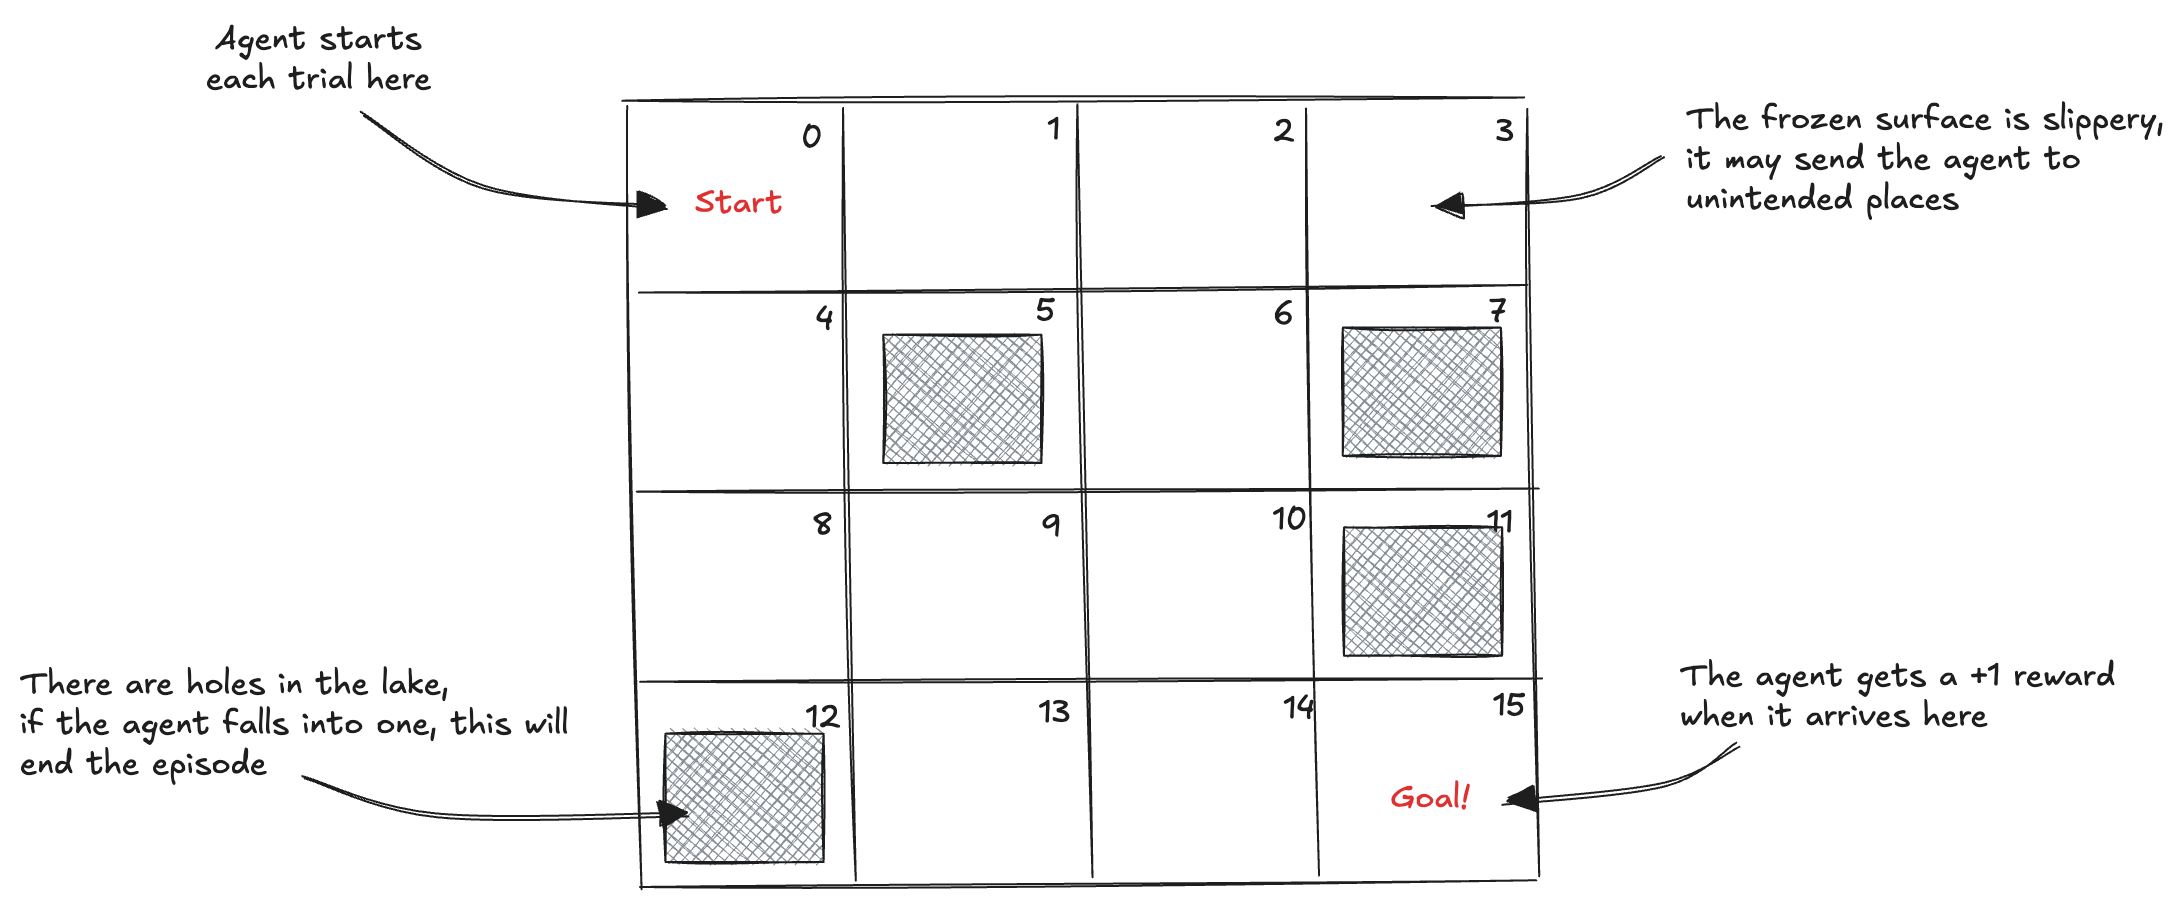

The environment is stochastic and the probability of the next state given the current state and action is less than 1. There are more than one possible next state:

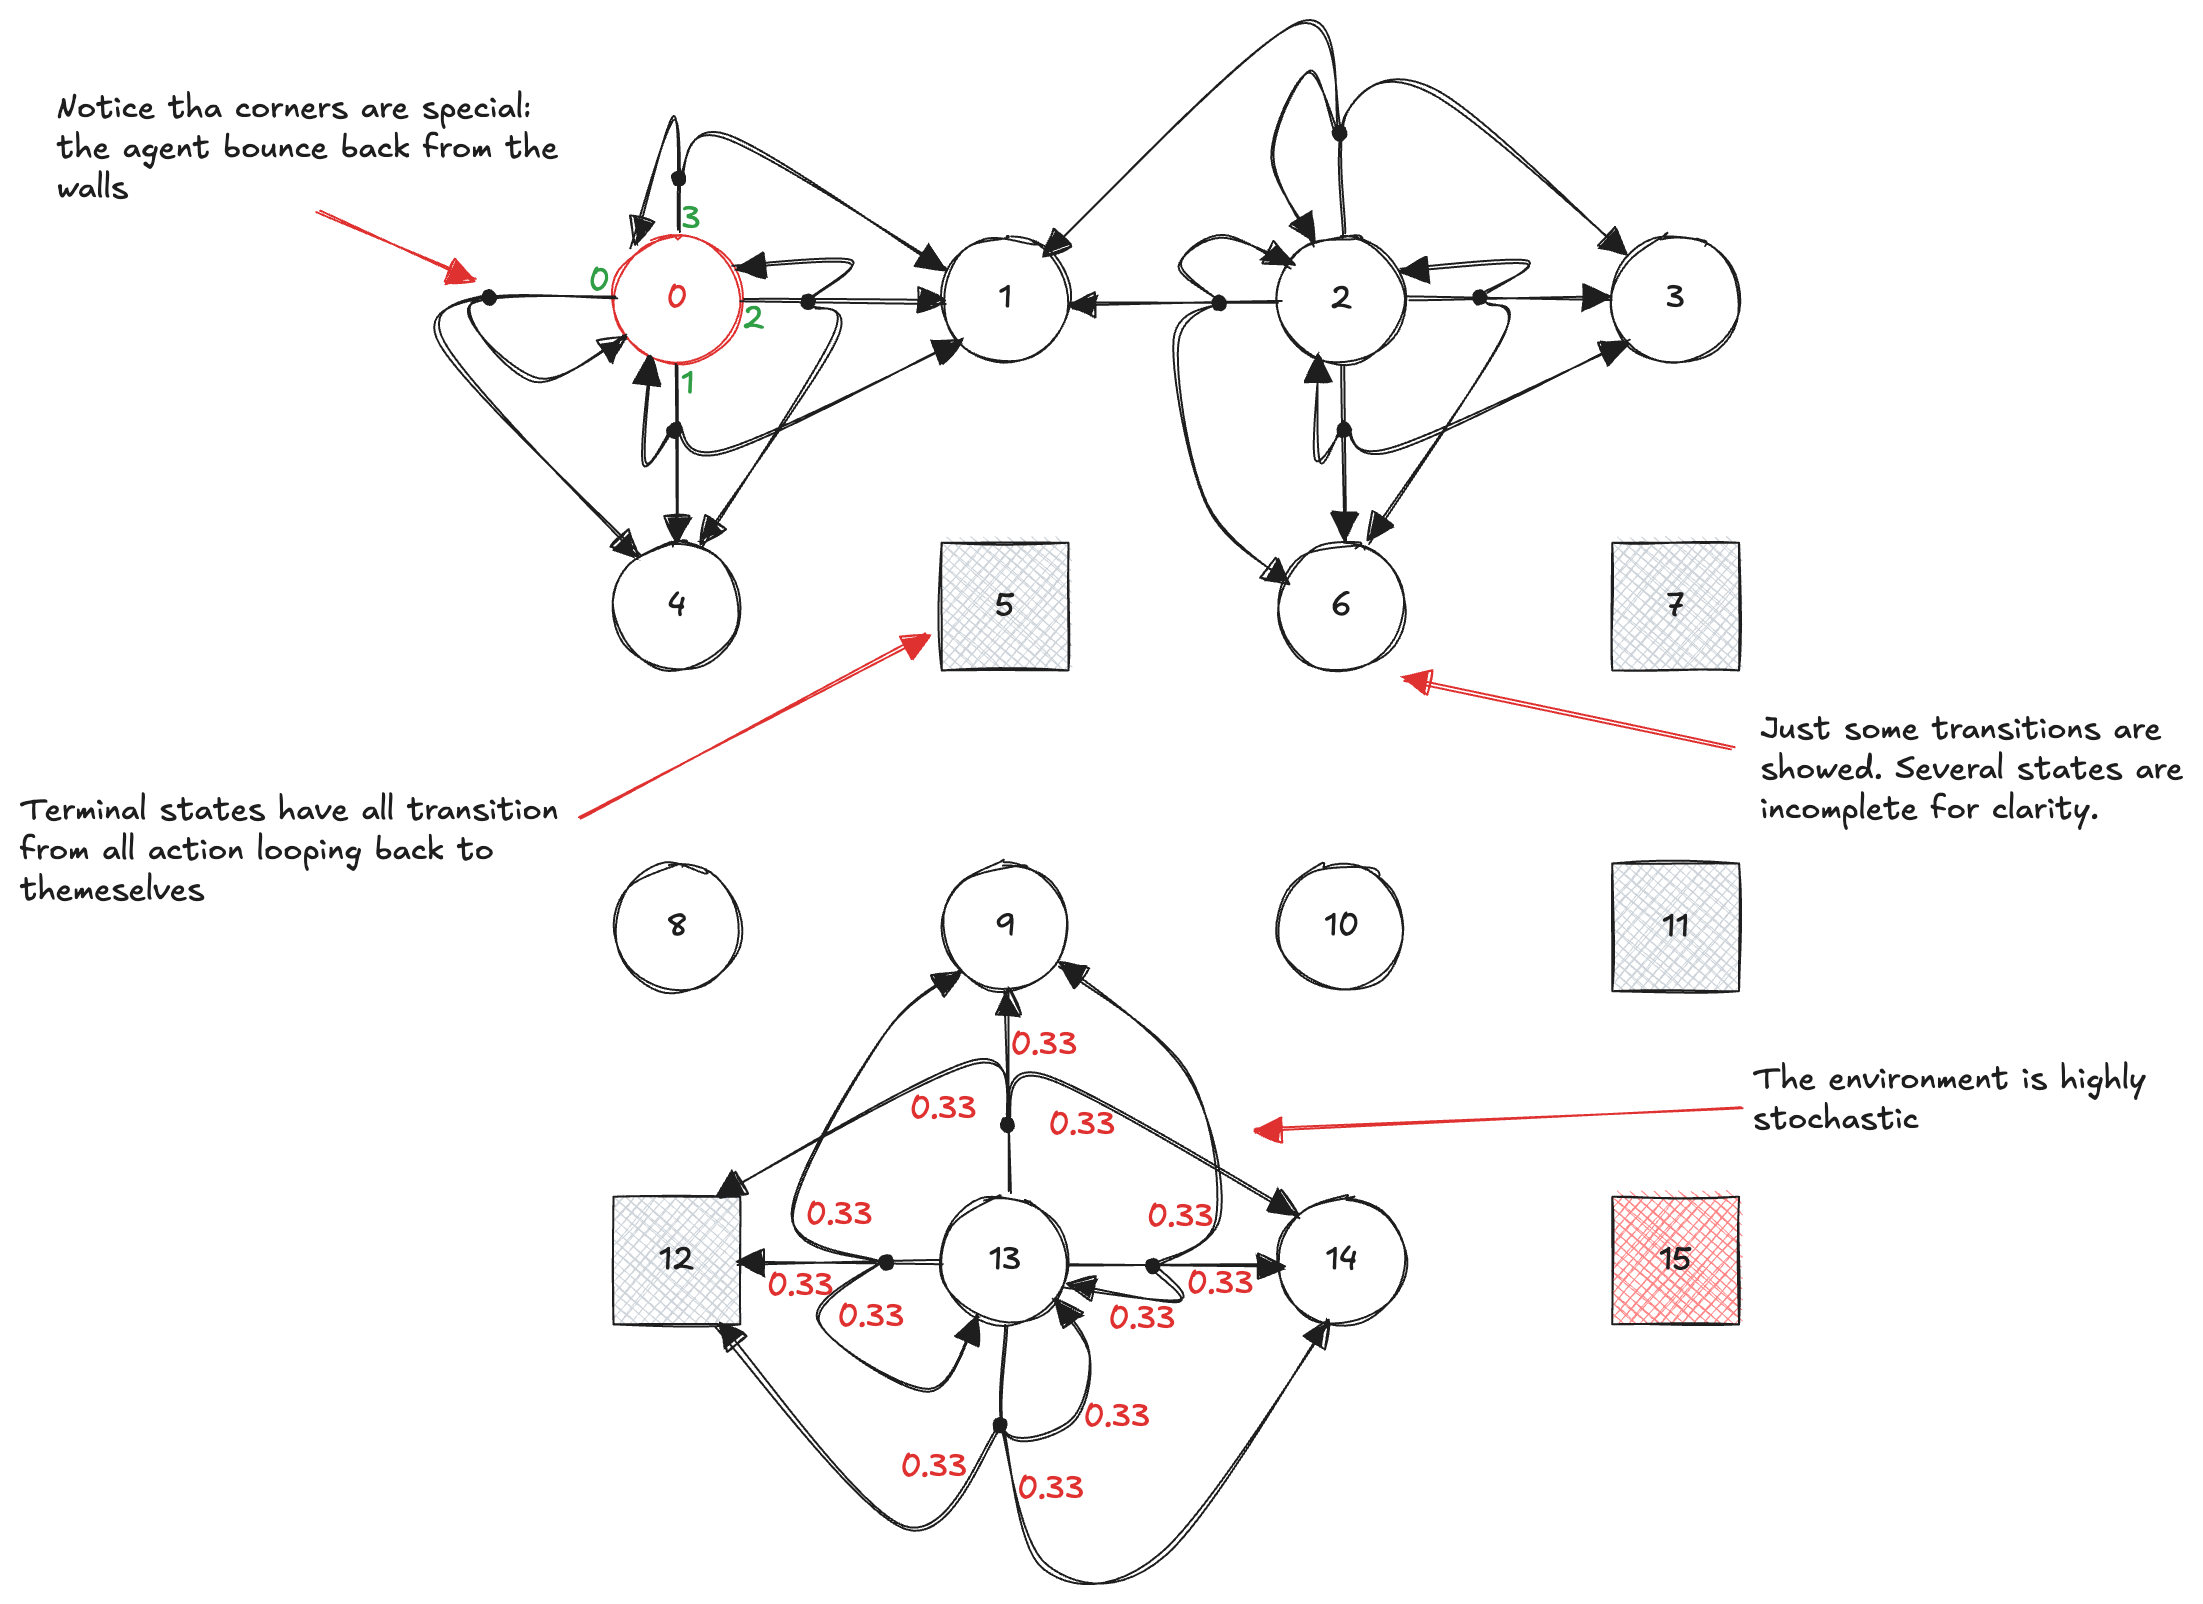

The reward function is +1 for landing in state 15, 0 otherwise. We can use a Python dictionary to represent the complete environment:

In [ ]:
P = {
    # The outer dictionary keys are the states.
    0: {
        # The inner dictionary keys are the actions
        0: [(0.6666666666666666, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False)
        ],
        # The value of the inner dictionary is a list with all 
        # possible transitions for that state-action pair.
        1: [(0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 1, 0.0, False)
        ],
        # The transition tuples have four values: the probability of that 
        # transition, the next state, the reward, and a flag indicating 
        # whether the next state is terminal
        2: [(0.3333333333333333, 4, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False)
        ],
        3: [(0.3333333333333333, 1, 0.0, False),
            (0.6666666666666666, 0, 0.0, False)
        ]
    },
    1: {
        0: [(0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 5, 0.0, True)
        ],
        1: [(0.3333333333333333, 0, 0.0, False),
            (0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 2, 0.0, False)
        ],
        2: [(0.3333333333333333, 5, 0.0, True),
            (0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False)
        ],
        3: [(0.3333333333333333, 2, 0.0, False),
            (0.3333333333333333, 1, 0.0, False),
            (0.3333333333333333, 0, 0.0, False)
        ]
    },
    ...
}

It is possible to load the environment using the **[Gymnasium library](https://gymnasium.farama.org/)**. It is a python library that provides a huge number of standard environments to work on RL algorithms with shared interfaces for writing general code and testing it:

In [4]:
import gymnasium as gym
fronzen_lake = gym.make('FrozenLake-v1');

We can consider a possible policy for this environment:

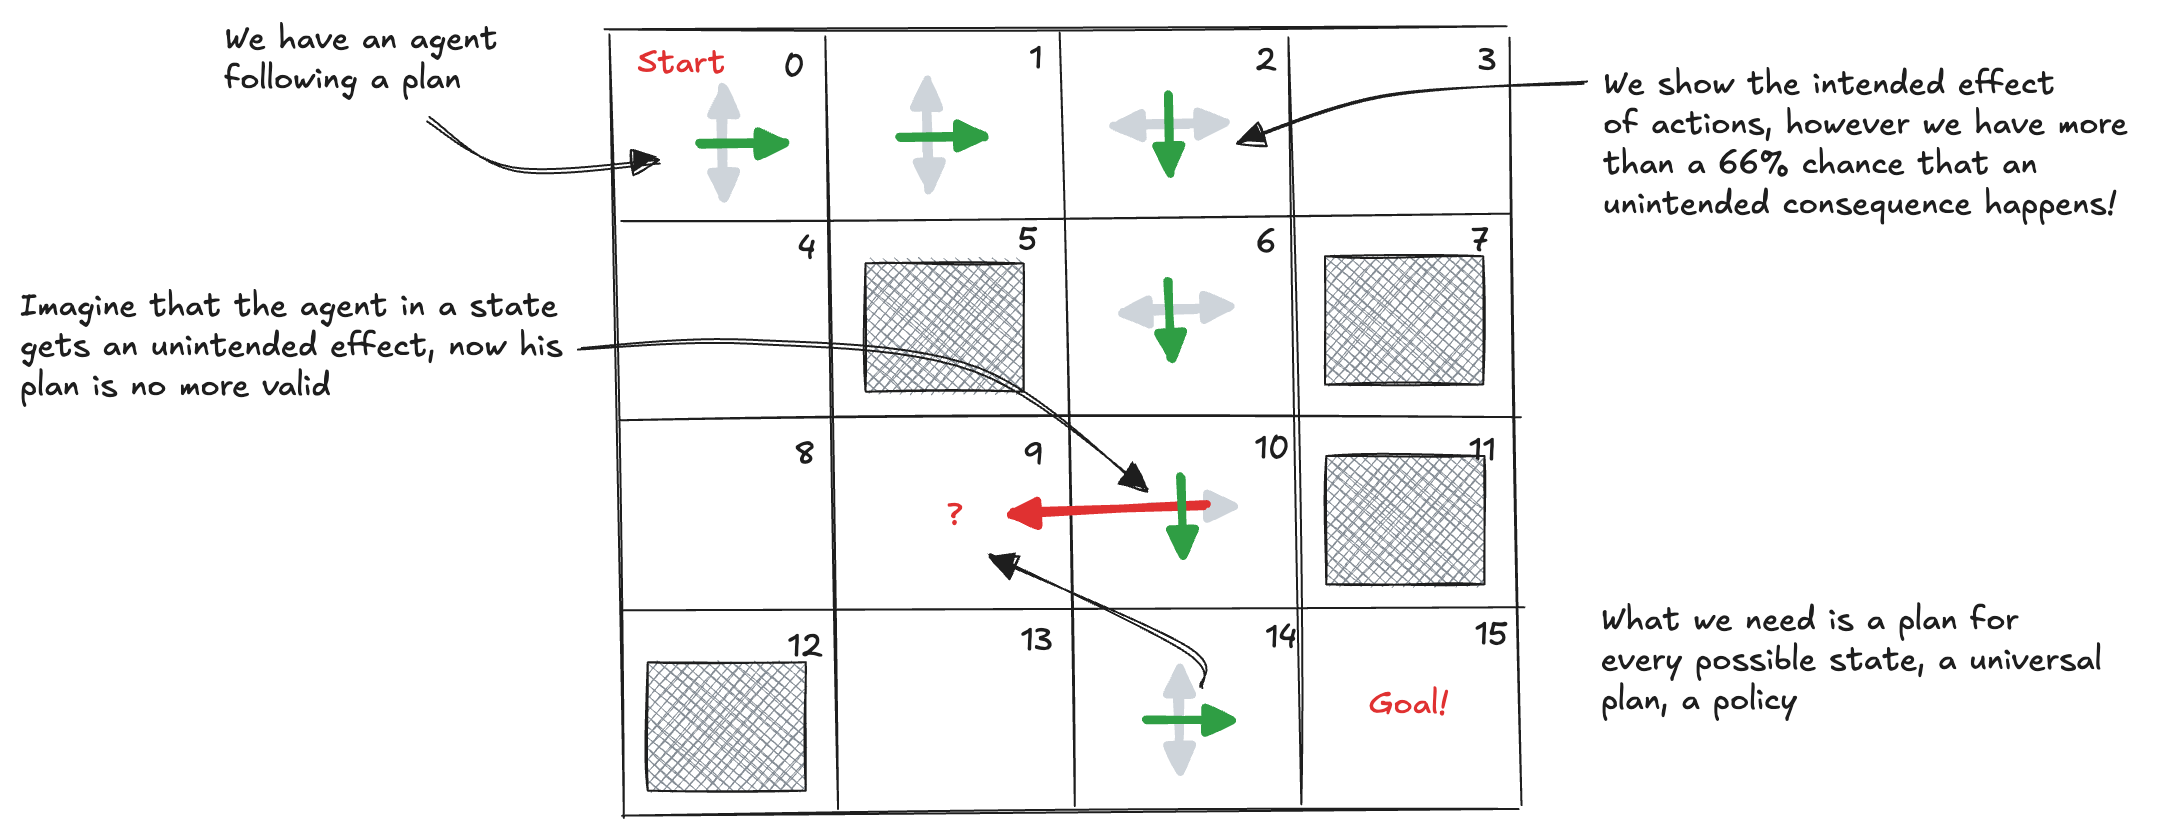